In [ ]:
# Title -     Diabetes Prediction Based On Health Indicators
# Group no. - 10
# Students -  Galpayage G. D. T. G.  EG/2020/3935 
#             Sundarasekara G. O.    EG/2020/3943 

# Import the packages

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA

# Import the dataset 

In [47]:
#import data to a pandas dataframe using kaggle dataset link
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Description of data

In [48]:
#show first 5 rows of the dataset
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [49]:
#describe the statistics of each column
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [50]:
#Columns of the dataframe
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [51]:
#get non-null count and data type of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [52]:
#get the null value count of each feature
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [53]:
#get the shape of dataframe
df.shape

(253680, 22)

<Axes: xlabel='Sex', ylabel='count'>

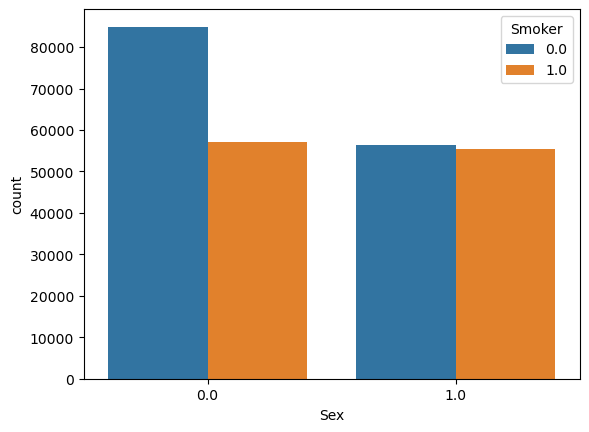

In [54]:
#Ploting the distribution of 'Sex' with respect to 'Smoker' status in the DataFrame 
sns.countplot(data=df , x="Sex", hue="Smoker")

In [55]:
#Obtaining the value counts of 'BMI'
df['BMI'].value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

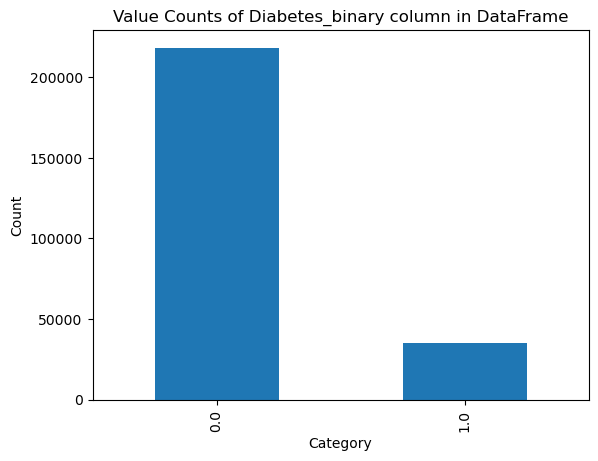

In [56]:
#Plot the value count of Diabetes_binary column which consists of the labels of our dataset
df['Diabetes_binary'].value_counts().plot(kind='bar')

#x-axis label
plt.xlabel('Category')
#y-axis label
plt.ylabel('Count')
#Title of the graph
plt.title('Value Counts of Diabetes_binary column in DataFrame')
plt.show()

Above bar graph depicts that the dataset is unbalanced.

# Pre-processing 

In [57]:
#Separating into majority and minority classes 
majority_class = df[df['Diabetes_binary'] == 0]
minority_class = df[df['Diabetes_binary'] == 1]

In [58]:
#Determinining the size of the minority class
minority_size = len(minority_class)

#Downsampling the majority class to match the minority class size
downsampled_majority = resample(majority_class, replace=False, n_samples=minority_size, random_state=42)

#Combining the downsampled majority class with the original minority class
balanced_dataset = pd.concat([downsampled_majority, minority_class])

#Shufflling the dataset to ensure randomness
df = balanced_dataset.sample(frac=1, random_state=42)

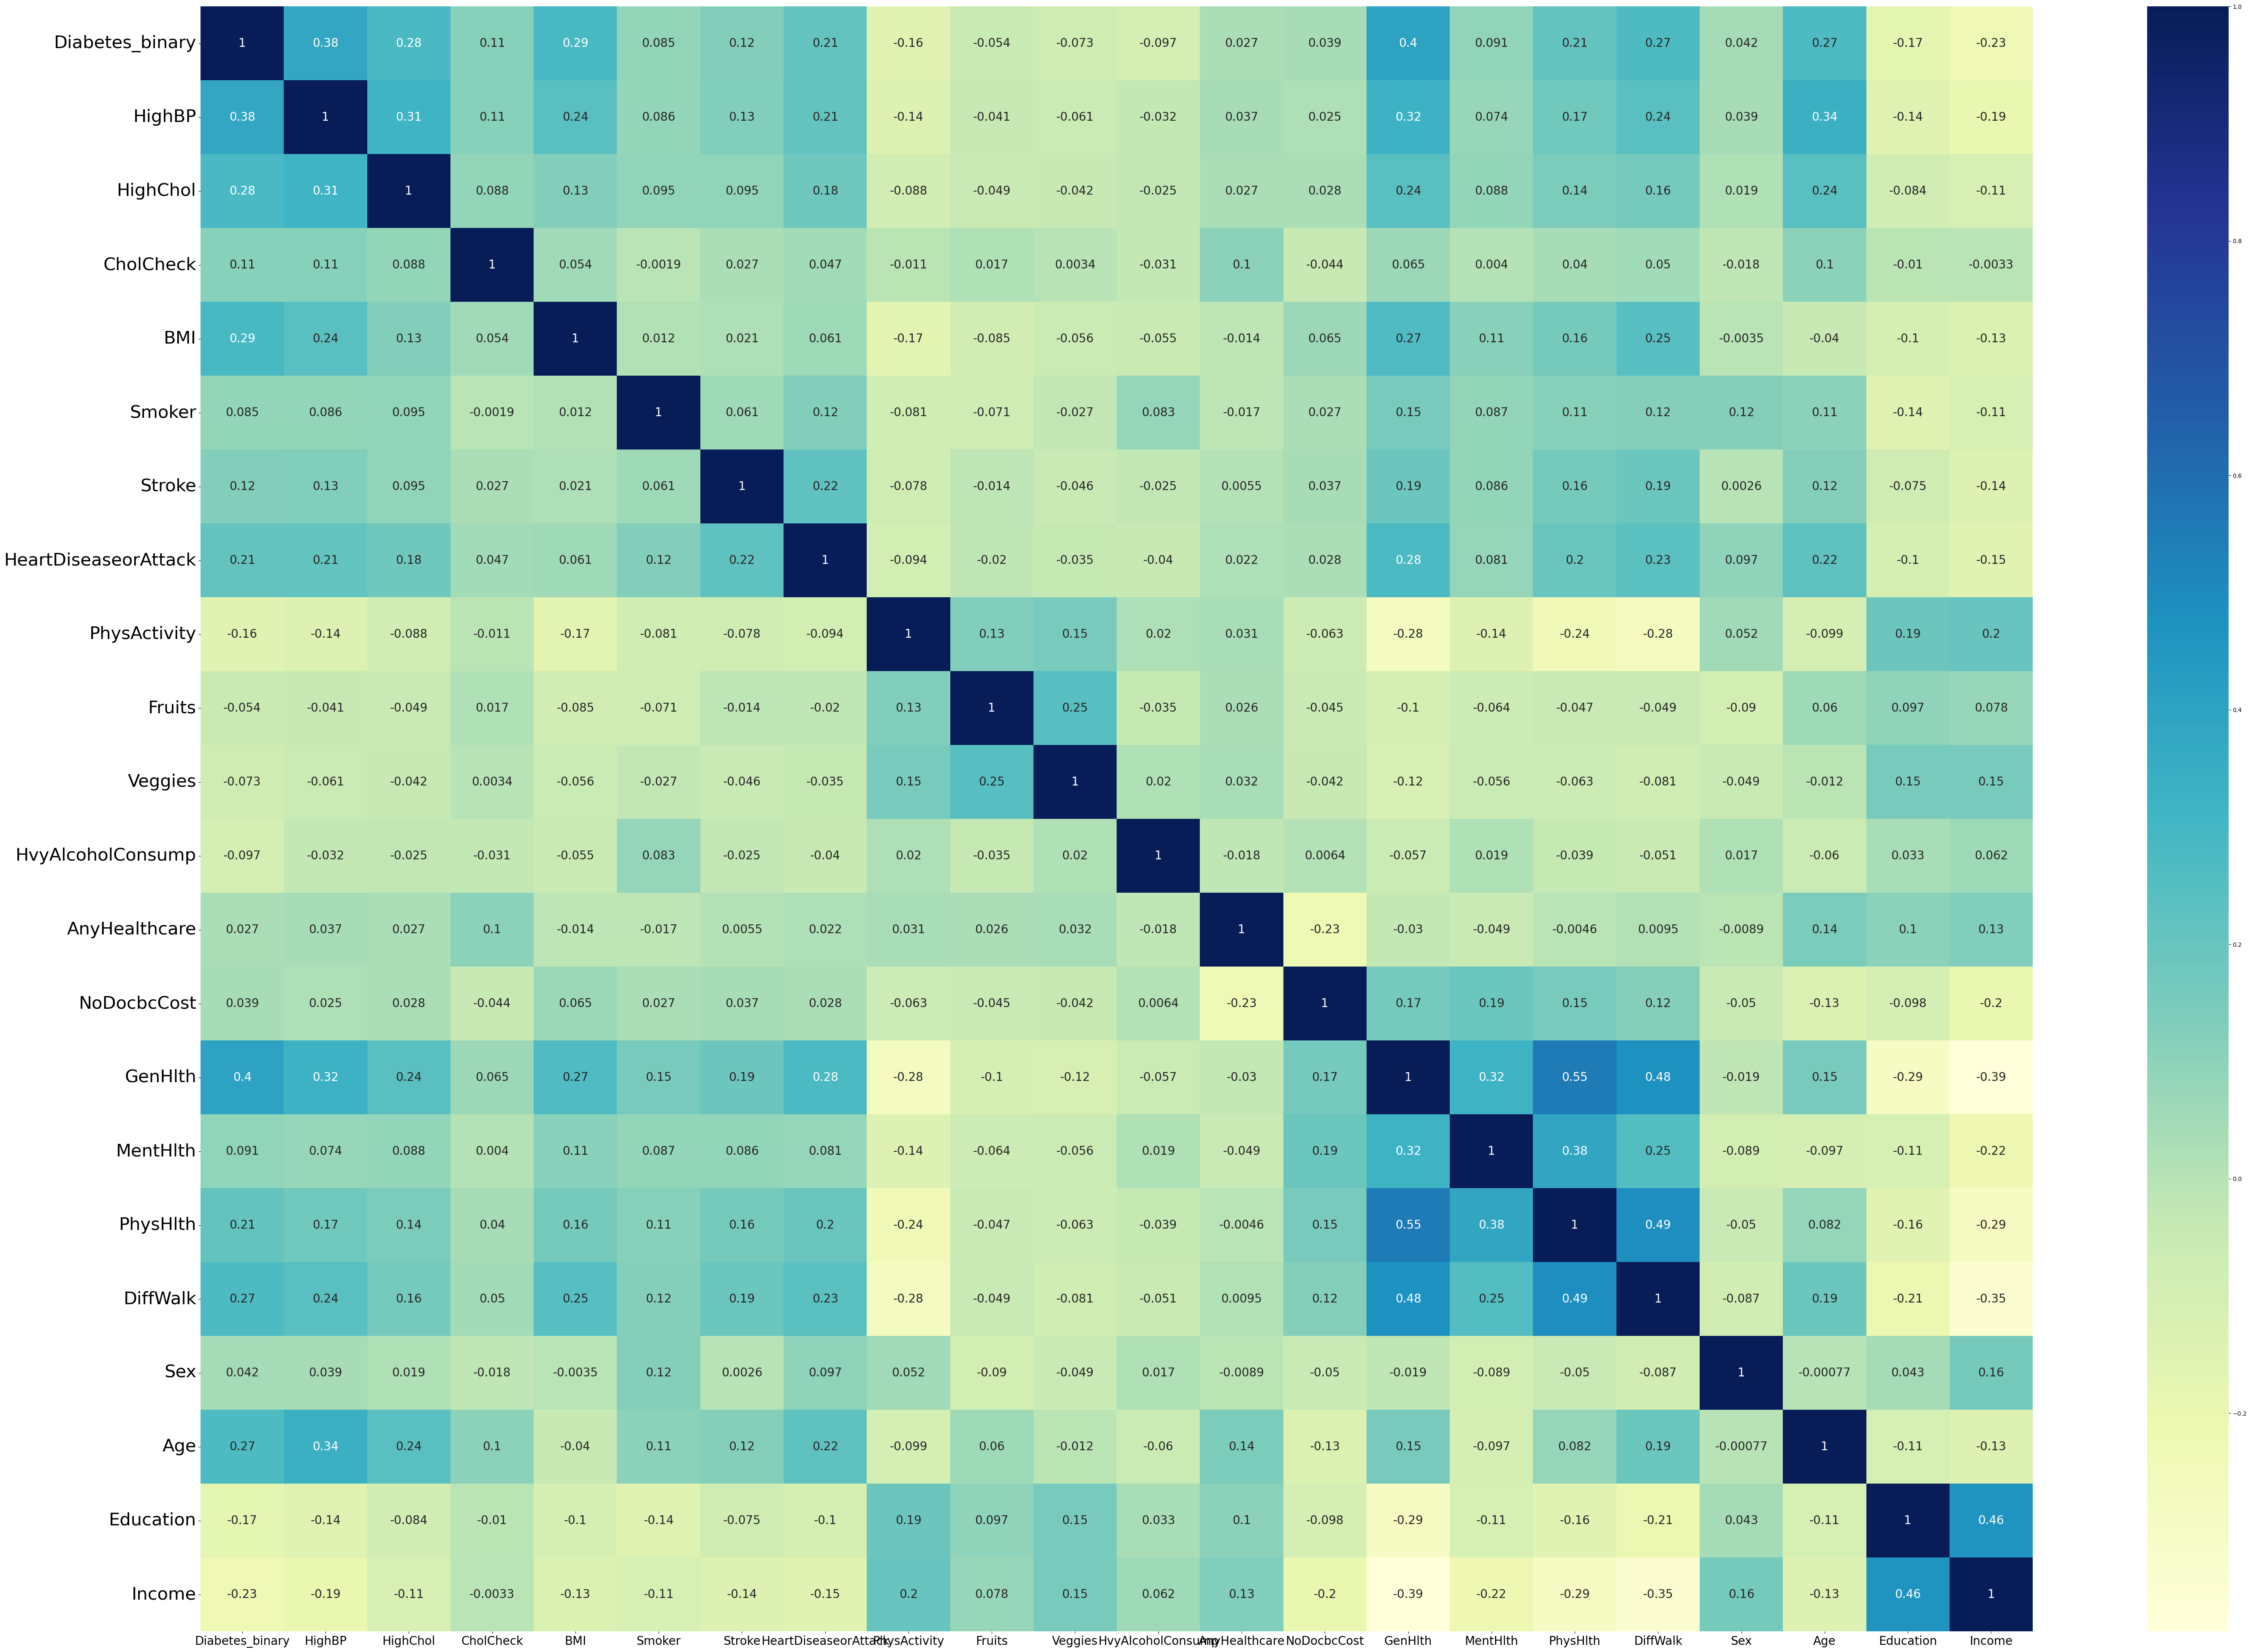

In [59]:
#Defining the figure size 
plt.figure(figsize=(70, 50))

#Ploting the heatmap to show correlation among the features
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True ,annot_kws={"size": 20})

#Increasing the size of label names
dataplot.set_xticklabels(dataplot.get_xticklabels(), size=20 ,rotation=0)
dataplot.set_yticklabels(dataplot.get_yticklabels(), size=30 ,rotation=0)

plt.show()

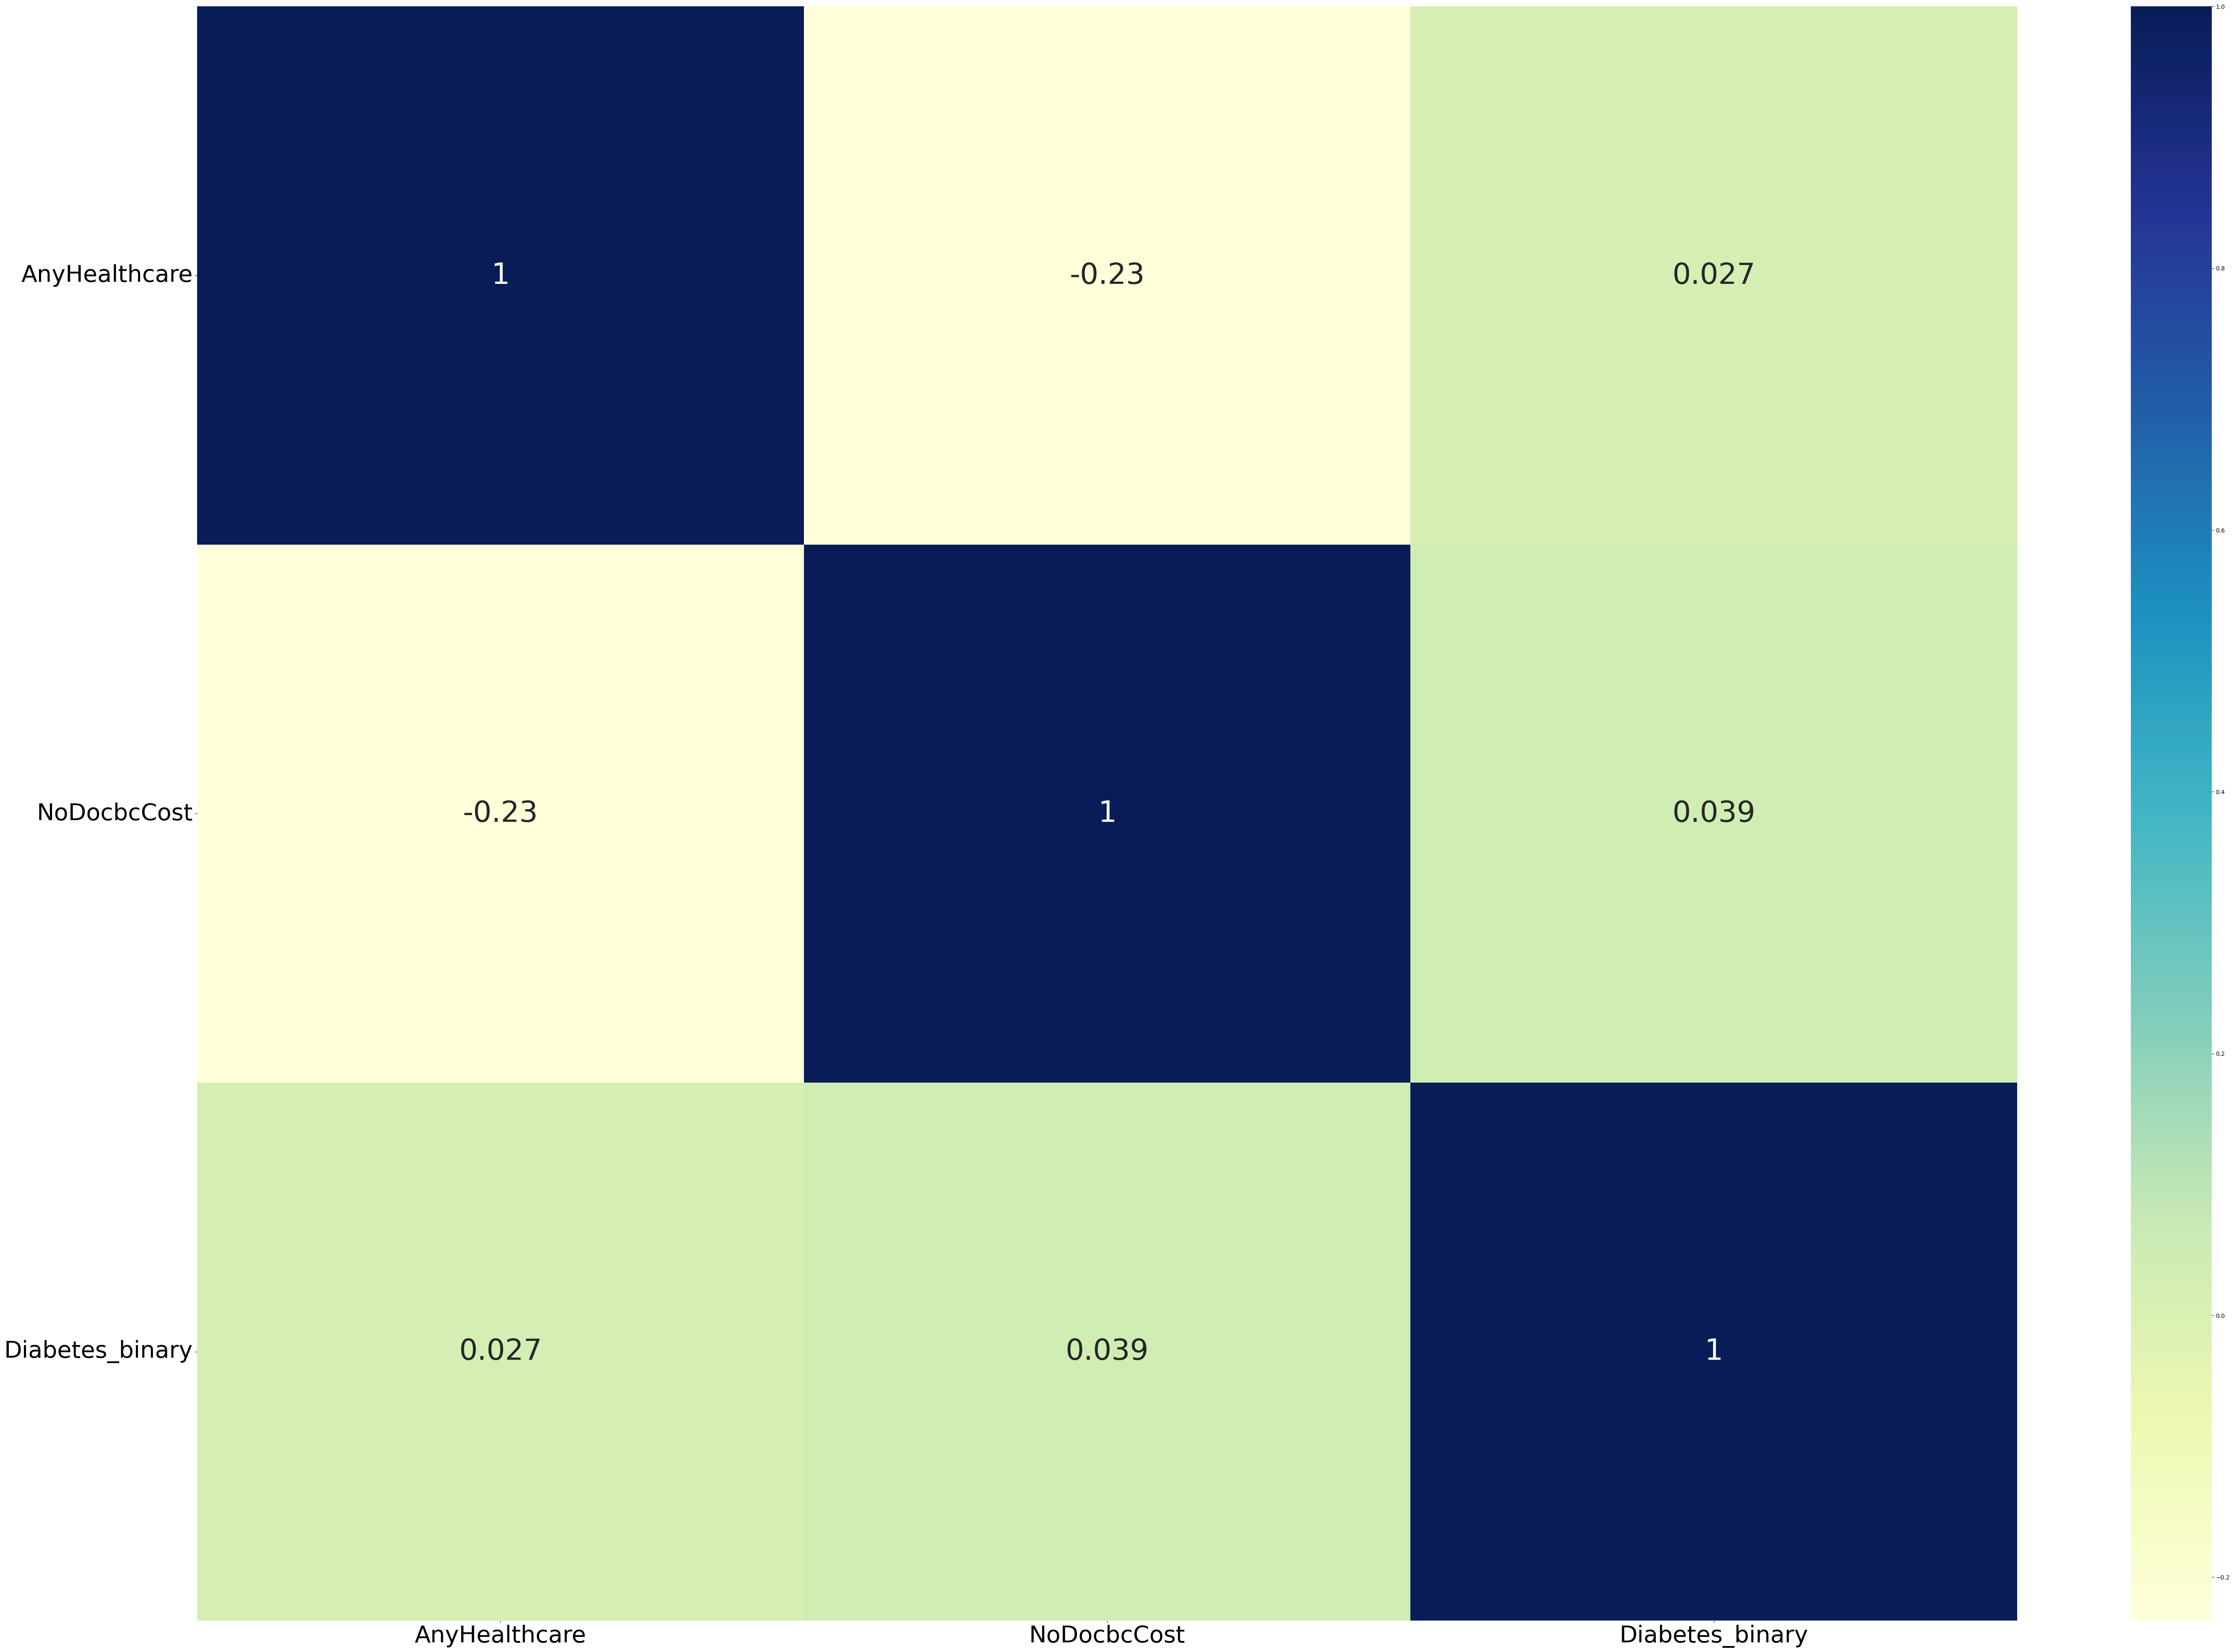

In [60]:
selected_columns = ['AnyHealthcare', 'NoDocbcCost', 'Diabetes_binary']

#Define the figure size 
plt.figure(figsize=(70, 50))

#Ploting the heatmap to show correlation among the features
dataplot = sns.heatmap(df[selected_columns].corr(), cmap="YlGnBu", annot=True ,annot_kws={"size": 50})

#Increasing the size of label names
dataplot.set_xticklabels(dataplot.get_xticklabels(), size=40 ,rotation=0)
dataplot.set_yticklabels(dataplot.get_yticklabels(), size=40 ,rotation=0)

plt.show()

AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

Diabetes_binary : 0 = no diabetes  ,  1 = diabetes or prediabetes

* In general, there is no any relationship between having a health care coverage and getting diabetes. Even according to the heat map, there is no correlation in between AnyHealthcare and Diabetes_binary. Hence, this feature can be removed.

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

* In general, there is no any relationship between seeing or not seeing a doctor due to cost and getting diabetes. Even according to the heat map, there is no correlation in between NoDocbcCost and Diabetes_binary. Hence, this feature can be removed.


In [61]:
#Droping AnyHealthcare and NoDocbcCost columns form the dataset 
df = df.drop(['AnyHealthcare', 'NoDocbcCost'] , axis=1)

In [62]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [63]:
print(df.shape)

(70692, 20)


In [64]:
#Extracting feature columns from the dataframe by droping the labels column
x = df.drop('Diabetes_binary', axis=1)
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70010,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
135194,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,8.0
139457,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,5.0,8.0
141006,0.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,30.0,1.0,1.0,6.0,6.0,7.0
51076,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [65]:
#Extracting labels column from the dataset
y = df['Diabetes_binary']
y.head()

70010     1.0
135194    0.0
139457    0.0
141006    0.0
51076     1.0
Name: Diabetes_binary, dtype: float64

In [66]:
#Intializing Min Max Scaler (Default scale min = 0 , max = 1)
scaler = MinMaxScaler()

categorical_columns = ['BMI', 'MentHlth', 'PhysHlth']

x[categorical_columns].describe()

,BMI,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000
mean,29.882886,3.721213,5.821168
std,7.179618,8.112567,10.066376
min,12.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000
75%,33.000000,2.000000,6.000000
max,98.000000,30.000000,30.000000


In [67]:
#Normalizing columns in the range of 0 to 1
x[categorical_columns] = scaler.fit_transform(x[categorical_columns])

#normalized values
normalized_column = x[categorical_columns]
normalized_column.describe()

,BMI,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000
mean,0.207941,0.124040,0.194039
std,0.083484,0.270419,0.335546
min,0.000000,0.000000,0.000000
25%,0.151163,0.000000,0.000000
50%,0.197674,0.000000,0.000000
75%,0.244186,0.066667,0.200000
max,1.000000,1.000000,1.000000


In order to reduce the no. of dimensions, PCA can be done.

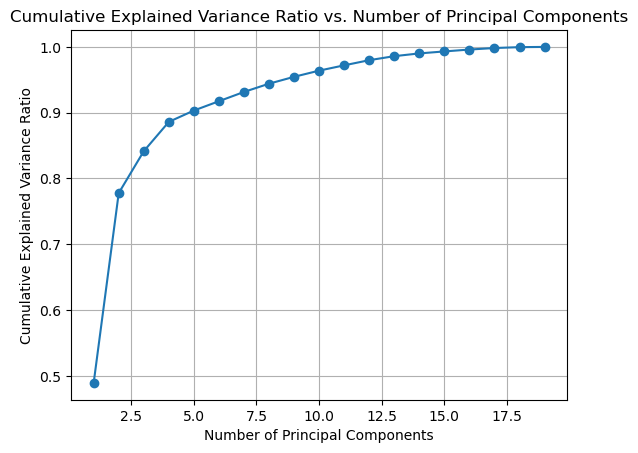

In [68]:
# Initializing PCA with 21 features
pca = PCA(n_components=x.shape[1])

# Fitting PCA to the data
pca.fit(x)

# Obtaining the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

According to the above plot, 10 would be an appropriate no of dimensions.

In [69]:
#Initializing the PCA model by setting the no.of components to 10
pca = PCA(n_components=10)

# Fitting and transforming the features using PCA
features_pca = pca.fit_transform(x)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', "PC6", 'PC7', 'PC8', 'PC9', 'PC10'])

# Printing the explained variance ratio to see how much variance is retained by each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.48919957 0.28859547 0.06369439 0.04456962 0.01724004 0.01417091
 0.01409226 0.01253573 0.01046805 0.0093798 ]


Cumulative expalined variance ratio from 10 features : 0.48919957 + 0.28859547 + 0.06369439 + 0.04456962 + 0.01724004 + 0.01417091 + 0.01409226 + 0.01253573 + 0.01046805 + 0.0093798 = 0.96394618

# Splitting the dataset

In [24]:
#Splitting the dataset as 70% for training and 30% for testing with a random state of 3
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3, random_state=42)

# Training the data while tuning hyperparameters

## Using logistic regression model 

In [25]:
#Defining the parameter grid for hyperparameter tunning
parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], #Inverse regularization strength
    'penalty': [ 'l1', 'l2'  ], #Penalty
    'solver': ['liblinear', 'lbfgs' ,  'newton-cg', 'newton-cholesky', 'sag', 'saga'] #Algorithm to use in optimization
}

In [26]:
#Initializing the logistic regression model 
logreg = LogisticRegression();

In [27]:
#Initilizing grid search CV model with 3 folds of cross validation , f1 score as the performance measure and  verbosity as 1
grid_search = GridSearchCV(logreg, parameter_grid, cv=3, scoring='f1',  verbose=1)

In [28]:
#Fitting the grid search to the data
grid_search.fit(x_train, y_train)

#Getting the best hyperparameters
best_params = grid_search.best_params_

#Evaluating test set based on the best model
test_f1_score = grid_search.score(x_test, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [29]:
#Displaying the best hyperparameters
print("Best Hyperparameters:", best_params)
#Displaying f1 score of best model
print("Test F1 score:", test_f1_score)

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test F1 score: 0.7550461229336012


In [74]:
#Defining best model using best hyperparameters
logreg_best = LogisticRegression(C=100 ,penalty='l2' , solver='liblinear')
#Training the dataset using the best hyperparameters
logreg_best.fit(x_train , y_train)

LogisticRegression(C=100, solver='liblinear')

In [75]:
y_train_pred = logreg_best.predict(x_train)

#Calculating the F1 score for training dataset in order to check wheather the model is overfitting
f1_train = metrics.f1_score(y_train, y_train_pred)

f1_train

0.7469591226321037

In [76]:
#Getting the predictions on test data
predictions  = logreg_best.predict(x_test)

In [77]:
#Getting f1 score for predictions
f1 = metrics.f1_score(y_test , predictions)
f1

0.7550461229336012

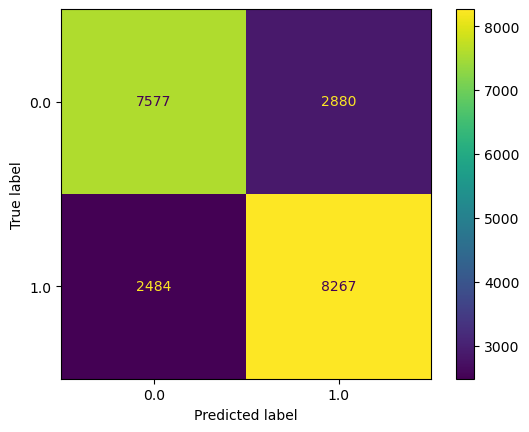

In [78]:
#Getting confusion metrics for predictions
confusion_metrics = metrics.confusion_matrix(y_test , predictions)
#Plotting the confusion metric 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_metrics, display_labels=logreg_best.classes_ )
disp.plot()

plt.show()

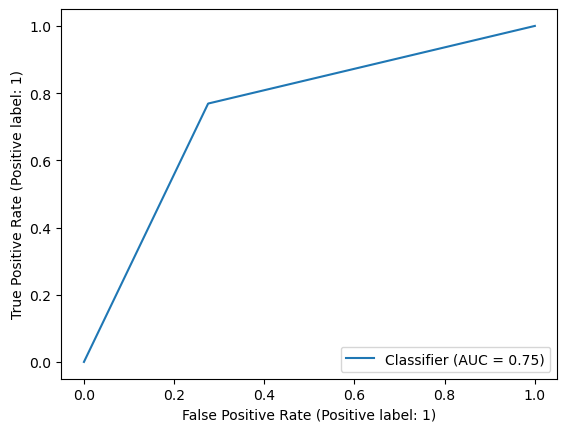

In [79]:
#Plotting ROC curve for predictions
confusion_metrics = metrics.RocCurveDisplay.from_predictions(y_test , predictions)

## Using random Forest classifier

In [36]:
#Defining parameter grid for random forest classifier
parameter_grid_random = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [ 5, 6],  # Maximum depth of each tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered at each split
    'min_samples_split': [5, 10 ],  # Minimum samples required to split a node
    'min_samples_leaf': [4, 8],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

#Initializing random forest classifier model
randomForest = RandomForestClassifier();


In [37]:
#Initilizing grid search CV model with 10 folds of cross validation , f1 score as the performance measure and  verbosity as 1
grid_search_random_forest = GridSearchCV(randomForest, parameter_grid_random, cv=10, scoring='f1',  verbose=1)

In [38]:
#Fitting the grid search to the data
grid_search_random_forest.fit(x_train, y_train )

#Getting the best hyperparameters
best_params = grid_search_random_forest.best_params_

#Evaluating the model on the test set
test_accuracy = grid_search_random_forest.score(x_test, y_test)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Acer\anaconda3\envs\py39\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\U

In [39]:
#Displaying the best hyperparameters
print("Best Hyperparameters:", best_params)

#Displaying the test accuracy for the best model
print("Test f1 score:", test_accuracy)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Test f1 score: 0.7585345173814093


In [80]:
#Defining best model using best hyperparameters
randomForest_best = RandomForestClassifier(n_estimators=100, max_depth=6, max_features='sqrt',min_samples_split=5 ,  min_samples_leaf=4, bootstrap=True)

#Training the dataset using the best hyperparameters
randomForest_best.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=5)

In [81]:
y_train_pred = randomForest_best.predict(x_train)

#Calculating the F1 score for the training dataset in order to check wheather the model is overfitting
f1_train = metrics.f1_score(y_train, y_train_pred)

f1_train

0.7569614353955493

In [82]:
#Getting the predictions on test data
predictions  = randomForest_best.predict(x_test)

In [83]:
#Getting f1 score for predictions
f1_test = metrics.f1_score(y_test , predictions)
f1_test

0.7574027827327864

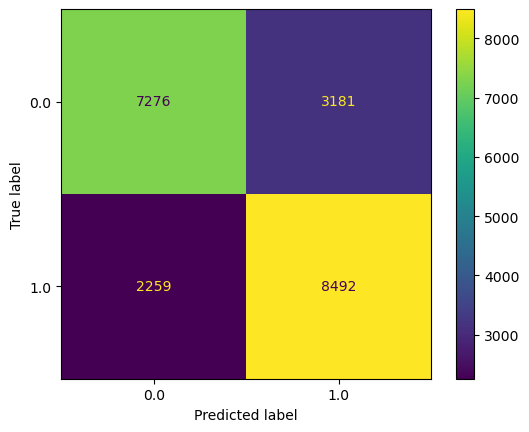

In [84]:
#Getting confusion metrics for predictions
confusion_metrics = metrics.confusion_matrix(y_test , predictions)

#Plotting the confusion metric 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_metrics, display_labels=randomForest_best.classes_ )
disp.plot()

plt.show()

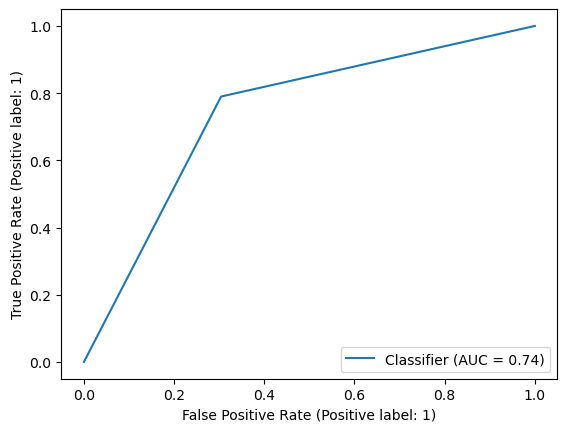

In [85]:
#Plotting ROC curve for the predictions
confusion_metrics = metrics.RocCurveDisplay.from_predictions(y_test , predictions)